In [1]:
import reader
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading the dataset

In [40]:
data=np.power(np.log1p(reader.get_all_data()), 1/2)
data.head()

,Property Crime,Violent Crime,Total Crime,Mean Income (Household),Median Income (Household),Per Capita Income,Income Standard Deviation (Household),Percent High School Dropouts,Percent No Degree
Area_name,,,,,,,,,
"Abbeville, SC",2.394169,1.993504,2.426587,3.262404,3.227876,3.118898,3.231750,1.783876,1.929319
"Acadia, LA",2.519142,1.956691,2.534172,3.280933,3.229655,3.127555,3.273484,1.867451,1.877190
"Accomack, VA",2.507338,2.064626,2.531637,3.298346,3.256562,3.162188,3.301536,1.790755,1.899793
"Ada, ID",2.642861,2.253276,2.668769,3.342622,3.306225,3.198907,3.322444,1.462896,1.968805
"Adair, IA",1.952203,1.312542,1.976870,3.295565,3.268064,3.168407,3.267359,1.474704,1.849419


### Data Visualization

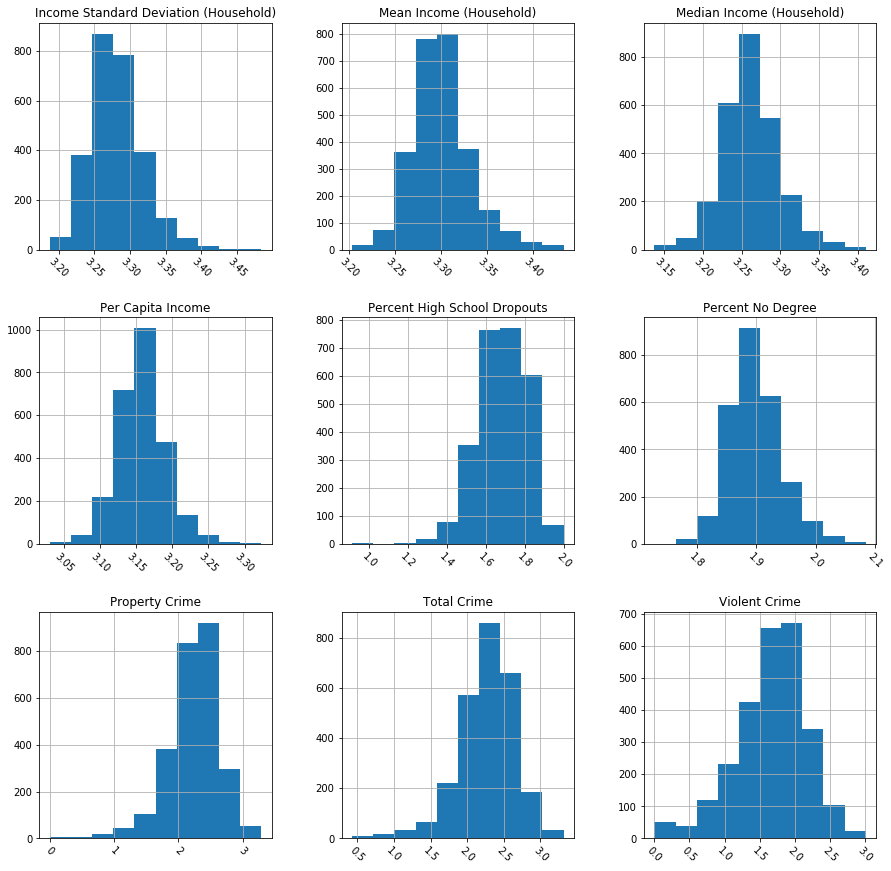

In [41]:
data.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

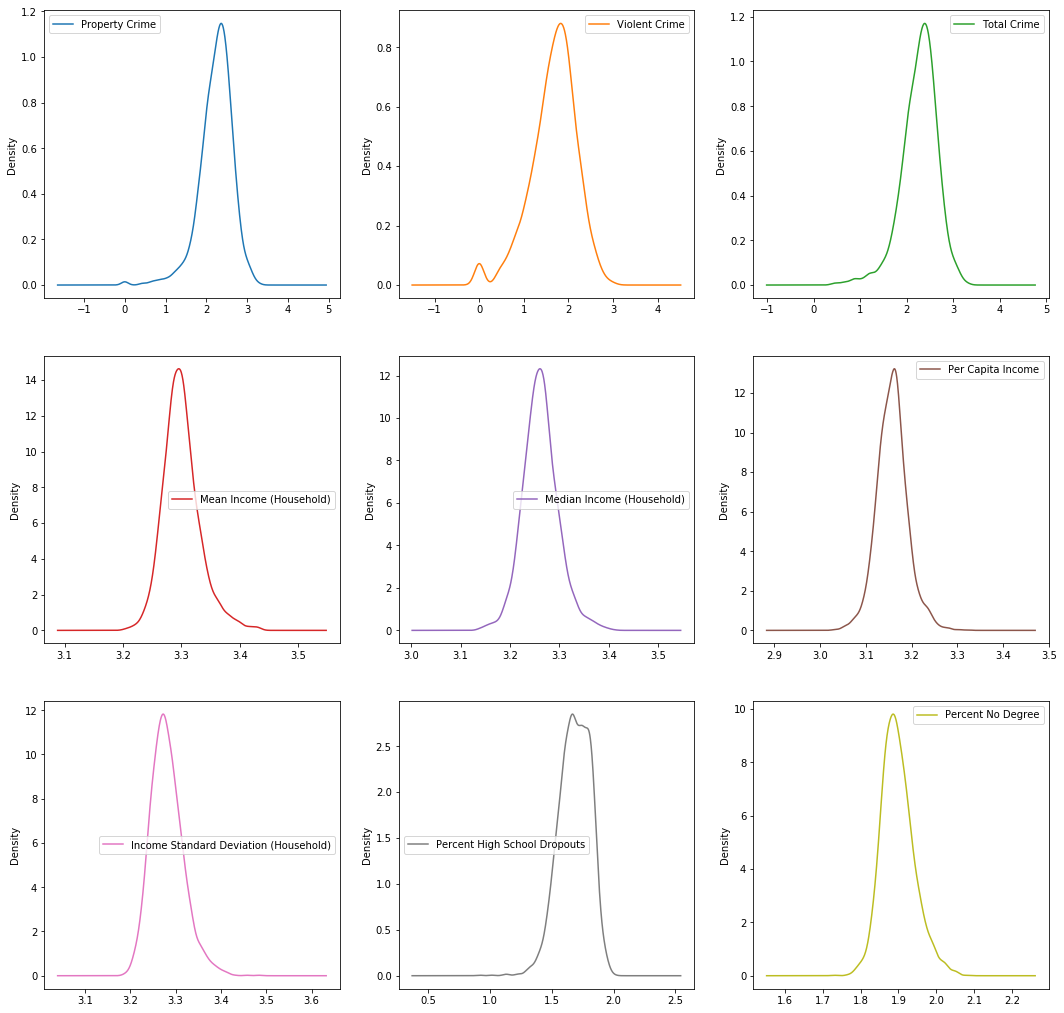

In [62]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(18,18))
plt.show()

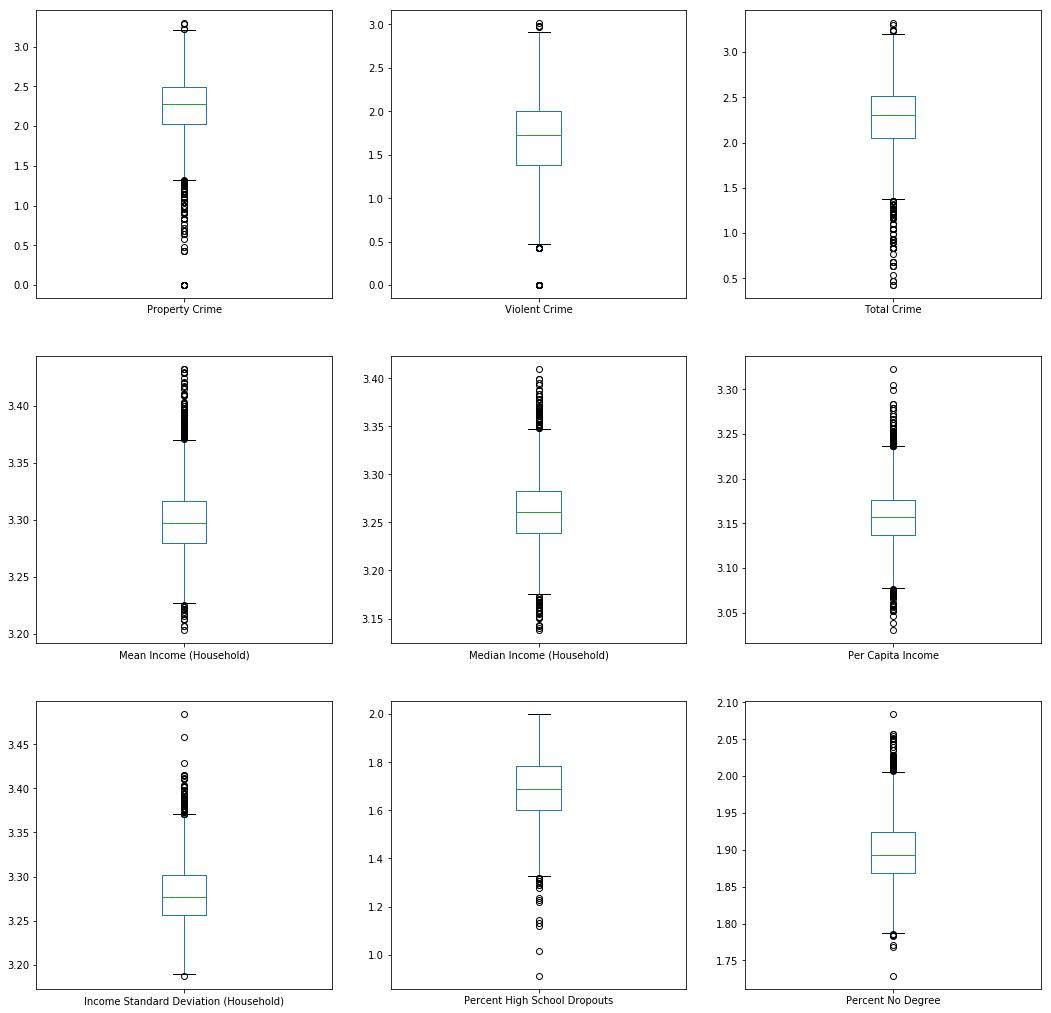

In [67]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(18,18))
plt.show()

#### Finding correlation between all the features

In [42]:
corrmat = data.corr() 
corrmat

,Property Crime,Violent Crime,Total Crime,Mean Income (Household),Median Income (Household),Per Capita Income,Income Standard Deviation (Household),Percent High School Dropouts,Percent No Degree
Property Crime,1.000000,0.862612,0.991522,0.298903,0.262969,0.191204,0.253952,-0.002154,0.308745
Violent Crime,0.862612,1.000000,0.900430,0.273550,0.224035,0.148756,0.260268,0.047876,0.321178
Total Crime,0.991522,0.900430,1.000000,0.309663,0.270816,0.195465,0.266440,0.002627,0.324764
Mean Income (Household),0.298903,0.273550,0.309663,1.000000,0.946542,0.912076,0.770531,-0.600382,0.627084
Median Income (Household),0.262969,0.224035,0.270816,0.946542,1.000000,0.858154,0.563128,-0.619703,0.522319
Per Capita Income,0.191204,0.148756,0.195465,0.912076,0.858154,1.000000,0.724425,-0.706754,0.591479
Income Standard Deviation (Household),0.253952,0.260268,0.266440,0.770531,0.563128,0.724425,1.000000,-0.361680,0.574107
Percent High School Dropouts,-0.002154,0.047876,0.002627,-0.600382,-0.619703,-0.706754,-0.361680,1.000000,-0.472206
Percent No Degree,0.308745,0.321178,0.324764,0.627084,0.522319,0.591479,0.574107,-0.472206,1.000000


#### Plotting the correlation between various features

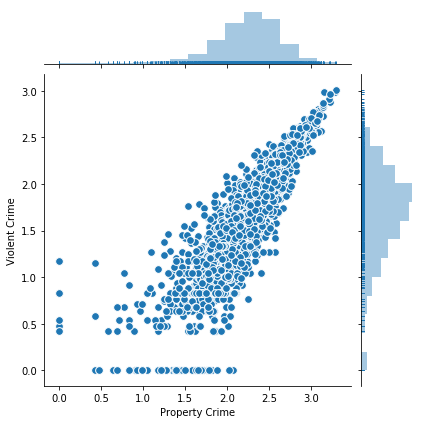

In [106]:
sns.jointplot(x=data['Property Crime'], y=data['Violent Crime'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

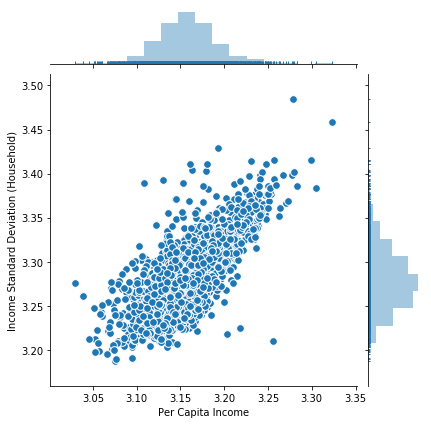

In [108]:
sns.jointplot(x=data['Per Capita Income'], y=data['Income Standard Deviation (Household)'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

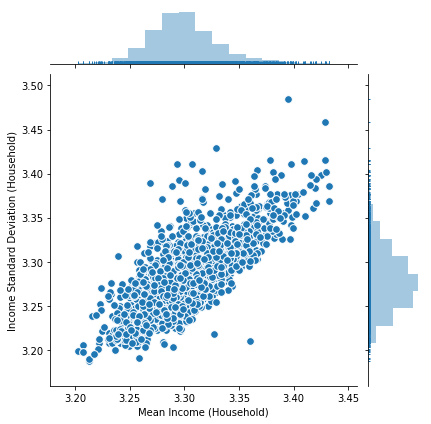

In [109]:
sns.jointplot(x=data['Mean Income (Household)'], y=data['Income Standard Deviation (Household)'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

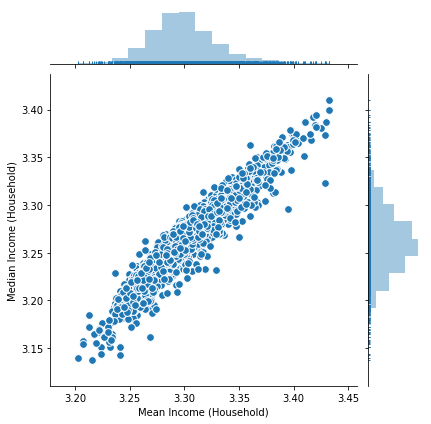

In [110]:
sns.jointplot(x=data['Mean Income (Household)'], y=data['Median Income (Household)'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

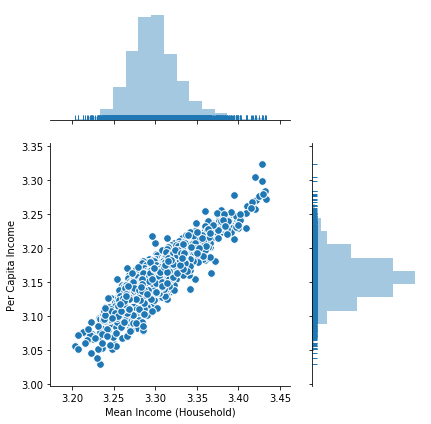

In [116]:
sns.jointplot(x=data['Mean Income (Household)'], y=data['Per Capita Income'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),ratio=2,
...                   s=60, edgecolor="w", linewidth=1)

#### Plotting correlations between similar types of features

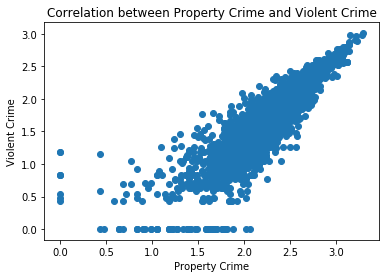

In [45]:
plt.scatter(data['Property Crime'],data['Violent Crime'])  
plt.xlabel('Property Crime')
plt.ylabel('Violent Crime')
plt.title('Correlation between Property Crime and Violent Crime')
plt.show()

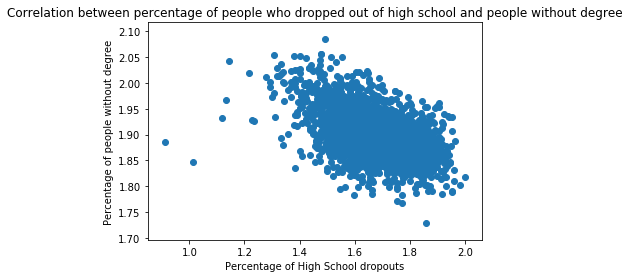

In [46]:
plt.scatter(data['Percent High School Dropouts'],data['Percent No Degree'])  
plt.xlabel('Percentage of High School dropouts')
plt.ylabel('Percentage of people without degree')
plt.title('Correlation between percentage of people who dropped out of high school and people without degree')
plt.show()

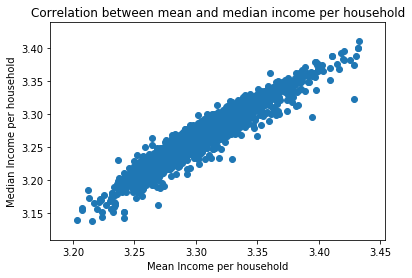

In [47]:
plt.scatter(data['Mean Income (Household)'],data['Median Income (Household)'])  
plt.xlabel('Mean Income per household')
plt.ylabel('Median Income per household')
plt.title('Correlation between mean and median income per household')
plt.show()

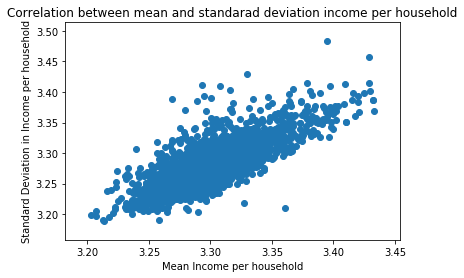

In [48]:
plt.scatter(data['Mean Income (Household)'],data['Income Standard Deviation (Household)'])  
plt.xlabel('Mean Income per household')
plt.ylabel('Standard Deviation in Income per household')
plt.title('Correlation between mean and standarad deviation income per household')
plt.show()

#### Plotting correlation between Per Capita Income, Education Level and Total Crime 

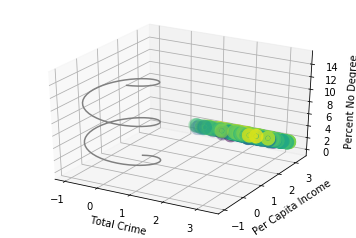

In [49]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 100)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = data['Percent High School Dropouts']
xdata = data['Total Crime']
ydata = data['Per Capita Income']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=10);
ax.set_xlabel('Total Crime')
ax.set_ylabel('Per Capita Income')
ax.set_zlabel('Percent No Degree');

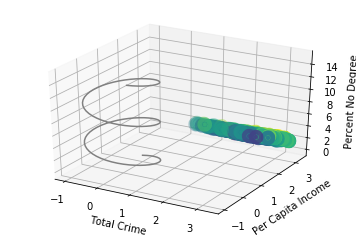

In [50]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 100)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = data['Percent No Degree']
xdata = data['Total Crime']
ydata = data['Per Capita Income']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=10);
ax.set_xlabel('Total Crime')
ax.set_ylabel('Per Capita Income')
ax.set_zlabel('Percent No Degree');

#### Plotting the correlation matrix using heatmap

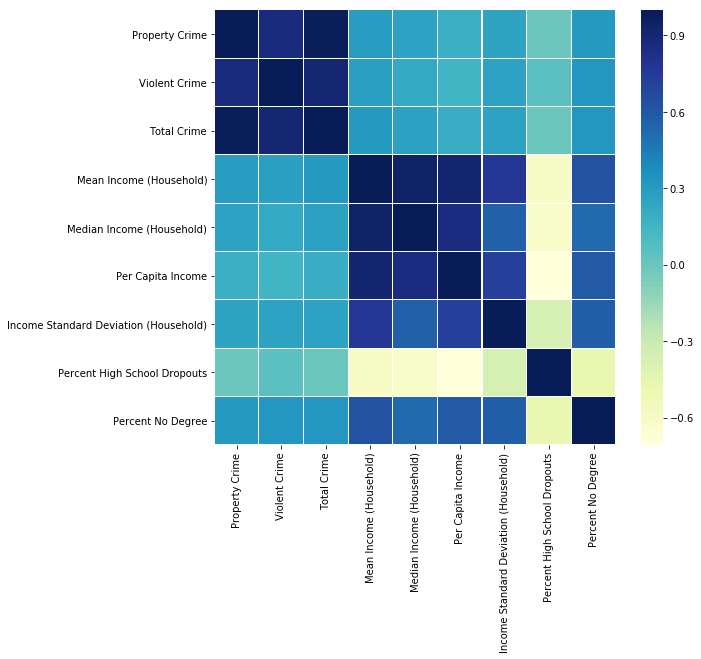

In [43]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

#### Plotting the correlation between features using scatter plot matrix

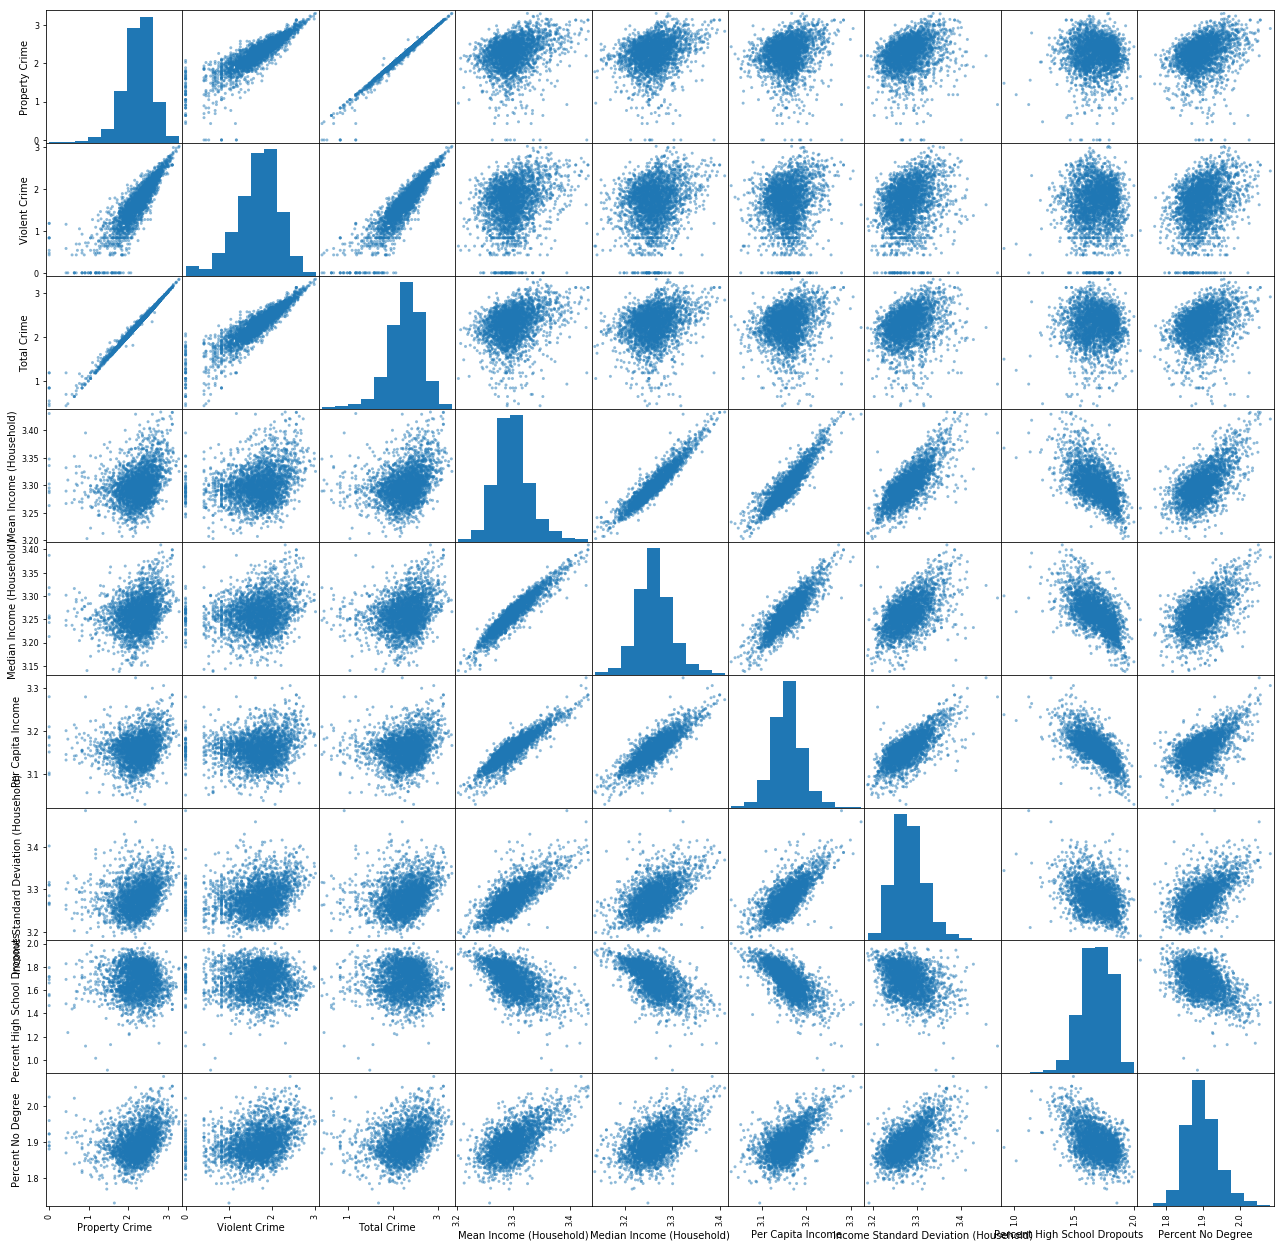

In [44]:
pd.plotting.scatter_matrix(data, figsize=(22, 22))
plt.show()

#### Getting features and label and performing few transformations

In [13]:
X = reader.get_features('dropout', 'mean')
y = reader.get_label('violent')
y = np.power(np.log1p(y),1/2)

In [14]:
from collections import OrderedDict
class Row(object):
    
    def __init__(self):
        self.education_type = None
        self.income_type = None
        self.LinearRegMSE = None
        self.RidgeMSE = None
        self.DicisionTreeMSE = None
        self.KNeighbourMSE = None
        self.SVR_MSE = None
        self.RandomForestMSE = None
        self.BoostingMSE = None

    def toDict(self):
        return {'education_type' : self.education_type,
                'income_type' : self.income_type,
                'LinearRegMSE':  self.LinearRegMSE,
                'RidgeMSE' : self.RidgeMSE,
                'DicisionTreeMSE' : self.DicisionTreeMSE,
                'KNeighbourMSE': self.KNeighbourMSE,
                'SVR_MSE' : self.SVR_MSE,
                'RandomForestMSE': self.RandomForestMSE,
                'BoostingMSE' :self.BoostingMSE
               }

#### Applying models

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings("ignore")

param_grid = {"education_type" :["dropout", "degreeless"], "income_type" :["mean", "median", "percapita", "deviation"]}
result = pd.DataFrame()

for param in list(ParameterGrid(param_grid)):
    row = Row()
    row.education_type = param['education_type']
    row.income_type = param['income_type']
    X = reader.get_features(param['education_type'], param['income_type'])
    y = reader.get_label('violent')
    y = np.power(np.log1p(y),1/2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    
    ## Scale input data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.to_numpy())
    X_test = scaler.fit_transform(X_test.to_numpy())
    
    ## Liner Regression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred=linreg.predict(X_test)
    row.LinearRegMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Ridge Regression
    ridgereg = Ridge(alpha=1.0)
    ridgereg=ridgereg.fit(X_train,y_train)
    y_pred=ridgereg.predict(X_test)
    row.RidgeMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Decision Tree
    regr = DecisionTreeRegressor(max_depth=2)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    row.DecisionTreeMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Random Forest Tree
    regr = RandomForestRegressor(max_depth=2)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    row.RandomForestMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### Boosting
    params = {'n_estimators': 100, 'max_depth': 2}
    clf = GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
    row.BoostingMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### KNN
    neigh = KNeighborsRegressor(n_neighbors=3)
    neigh.fit(X_train, y_train) 
    y_pred=neigh.predict(X_test)
    row.KNeighbourMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### SVR
    svr = SVR(gamma='auto')
    svr = svr.fit(X_train, y_train.values.ravel())
    y_pred=svr.predict(X_test)
    row.SVR_MSE = metrics.mean_squared_error(y_test, y_pred)
    
    result = result.append(row.toDict(), ignore_index=True)

result

,BoostingMSE,DicisionTreeMSE,KNeighbourMSE,LinearRegMSE,RandomForestMSE,RidgeMSE,SVR_MSE,education_type,income_type
0,0.217377,None,0.282361,0.213155,0.217377,0.213151,0.204330,dropout,mean
1,0.223147,None,0.313137,0.216551,0.223147,0.216552,0.215962,dropout,median
2,0.233987,None,0.292798,0.226300,0.233987,0.226302,0.225281,dropout,percapita
3,0.224543,None,0.308129,0.228070,0.224543,0.228069,0.221076,dropout,deviation
4,0.215754,None,0.301719,0.213964,0.215754,0.213963,0.217725,degreeless,mean
5,0.219051,None,0.306017,0.214696,0.219051,0.214695,0.220873,degreeless,median
6,0.220306,None,0.300694,0.217077,0.220306,0.217074,0.217681,degreeless,percapita
7,0.217598,None,0.283826,0.216008,0.217598,0.216008,0.214134,degreeless,deviation
